### Pandas练习——世界国家分析
   - 对提供的 WordIndex.csv 数据进行简单的查看和可视化分析。

In [1]:
import pandas as pd
import matplotlib

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [3]:
col=["Country","Continent","Life_expectancy","GDP_per_capita","Population"]
wi=pd.read_csv("/Users/dengsudden/Documents/python_course/WorldIndex.csv",sep=";",names=col)
wi.head()

,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.042537,4132.760292,39871528
1,Angola,Africa,52.666098,3695.793748,27859305
2,Benin,Africa,59.720707,783.947091,10575952
3,Botswana,Africa,64.487415,6532.060501,2209197
4,Burundi,Africa,57.107049,303.681022,10199270


In [4]:
wi.describe()

,Life_expectancy,GDP_per_capita,Population
count,164.000000,164.000000,1.640000e+02
mean,71.301273,12783.970324,4.253911e+07
std,8.511990,17966.848134,1.521931e+08
min,48.873951,303.681022,9.341900e+04
25%,65.340945,1690.241839,2.774335e+06
50%,73.650537,4961.785567,9.569478e+06
75%,77.133335,14536.831557,2.917300e+07
max,83.843659,101909.822300,1.371220e+09


In [5]:
wi.Continent.unique()

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)

### 总揽

In [68]:
#国家总数，总人口
print("国家总数:",wi.Country.count())
print("世界总人口：",wi.Population.sum())

#各大洲国家数量
print("\n","各大洲国家数量：")
print(wi.Continent.value_counts())

#各大洲人口数量
print("\n","各大洲人口总数：")
print(wi[["Continent","Population"]].groupby(by=["Continent"])["Population"].sum())

#预期寿命
print("\n","全球平均预期寿命:",wi.Life_expectancy.mean())
print("\n","预期寿命最短的国家：","\n",wi[wi["Life_expectancy"]==wi.Life_expectancy.min()])
print("\n","预期寿命最长的国家：","\n",wi[wi["Life_expectancy"]==wi.Life_expectancy.max()])

#GDP
print("\n","全球首都平均GDP:",wi.GDP_per_capita.mean())
print("\n","首都GDP最低的国家：","\n",wi[wi["GDP_per_capita"]==wi.GDP_per_capita.min()])
print("\n","首都GDP最高的国家：","\n",wi[wi["GDP_per_capita"]==wi.GDP_per_capita.max()])

国家总数: 164
世界总人口： 6976414673

 各大洲国家数量：
Africa           48
Europe           41
Asia             36
North America    19
South America    11
Oceania           9
Name: Continent, dtype: int64

 各大洲人口总数：
Continent
Africa           1063429293
Asia             4321362716
Europe            608775990
North America     567191051
Oceania            30646235
South America     385009388
Name: Population, dtype: int64

 全球平均预期寿命: 71.30127260524394

 预期寿命最短的国家： 
       Country Continent  Life_expectancy  GDP_per_capita  Population
41  Swaziland    Africa        48.873951      3136.92511     1319011

 预期寿命最长的国家： 
    Country Continent  Life_expectancy  GDP_per_capita  Population
59   Japan      Asia        83.843659     34474.13736   127141000

 全球首都平均GDP: 12783.970323954876

 首都GDP最低的国家： 
    Country Continent  Life_expectancy  GDP_per_capita  Population
4  Burundi    Africa        57.107049      303.681022    10199270

 首都GDP最高的国家： 
         Country Continent  Life_expectancy  GDP_per_capita  Popul

#### 按GDP、人口数、预期寿命分段进行统计分析

In [57]:
print("人口数大于1亿的国家主要分布在亚洲:")
print(wi[wi.Population>100000000].Continent.value_counts())

人口数大于1亿的国家主要分布在亚洲:
Asia             8
North America    2
South America    1
Africa           1
Name: Continent, dtype: int64


In [69]:
print("首都GDP大于全球均值12784的国家分布在欧洲:")
print(wi[wi.GDP_per_capita>12784].Continent.value_counts())

首都GDP大于全球均值12784的国家分布在欧洲:
Europe           25
Asia              9
North America     7
South America     3
Oceania           2
Africa            1
Name: Continent, dtype: int64


In [61]:
print("预期寿命大于全球均值71.3岁的国家要分布在欧洲，与GDP呈现正相关性:")
print(wi[wi.Life_expectancy>71.3].Continent.value_counts())

预期寿命大于全球均值71.3岁的国家要分布在欧洲，与GDP呈现正相关性:
Europe           39
Asia             21
North America    16
South America     8
Africa            6
Oceania           5
Name: Continent, dtype: int64


### 下沉到各大洲进行分析

In [7]:
wi.head()

,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.042537,4132.760292,39871528
1,Angola,Africa,52.666098,3695.793748,27859305
2,Benin,Africa,59.720707,783.947091,10575952
3,Botswana,Africa,64.487415,6532.060501,2209197
4,Burundi,Africa,57.107049,303.681022,10199270


#### 中国的情况

In [71]:
print("中国人口数量全球排名第",wi[wi.Population>1360000000].Country.count(),"名")
print("中国预期寿命全球排名第",wi[wi.Life_expectancy>76].Country.count(),"名")
print("北京GDP全球首都排名第",wi[wi.GDP_per_capita>8069].Country.count(),"名")

中国人口数量全球排名第 1 名
中国预期寿命全球排名第 50 名
北京GDP全球首都排名第 64 名


#### 一维数据分析

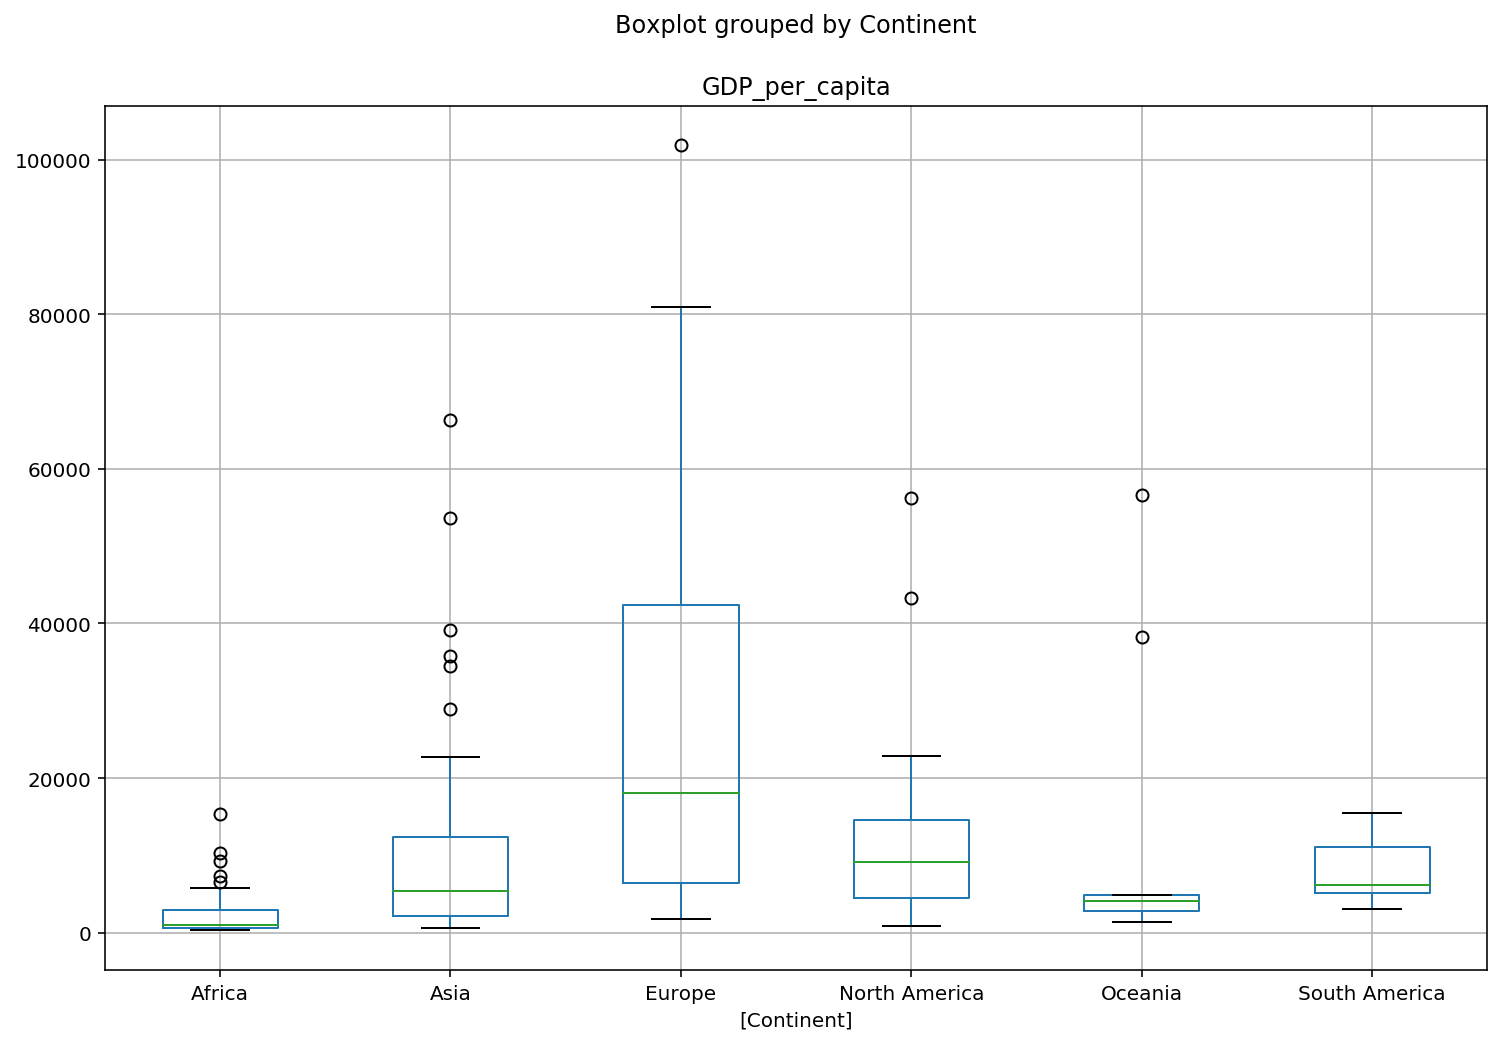

In [12]:
#各大洲国家的GDP箱线图，反映各大洲国家GDP分布情况，均值是多少，中位数是多少，最大最小值等
wi[["Continent","GDP_per_capita"]].boxplot(by="Continent",figsize=(12,8))

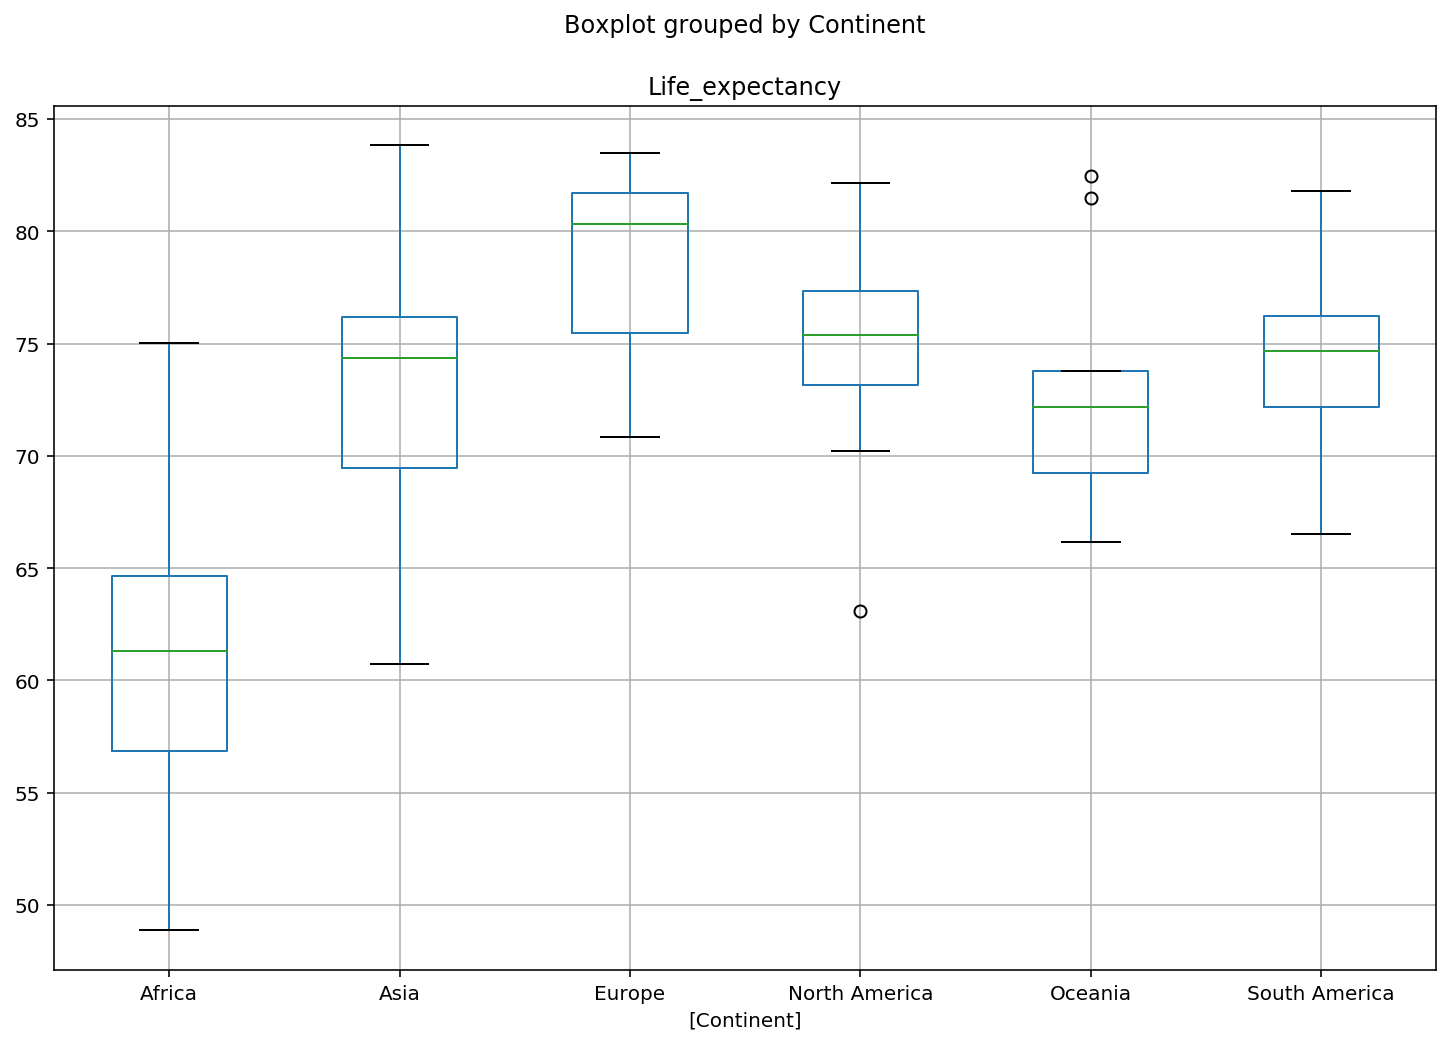

In [11]:
#各大洲国家的预期寿命箱线图，反映各大洲国家预期寿命分布情况，均值是多少，中位数是多少，最大最小值等
wi[["Continent","Life_expectancy"]].boxplot(by="Continent",figsize=(12,8))

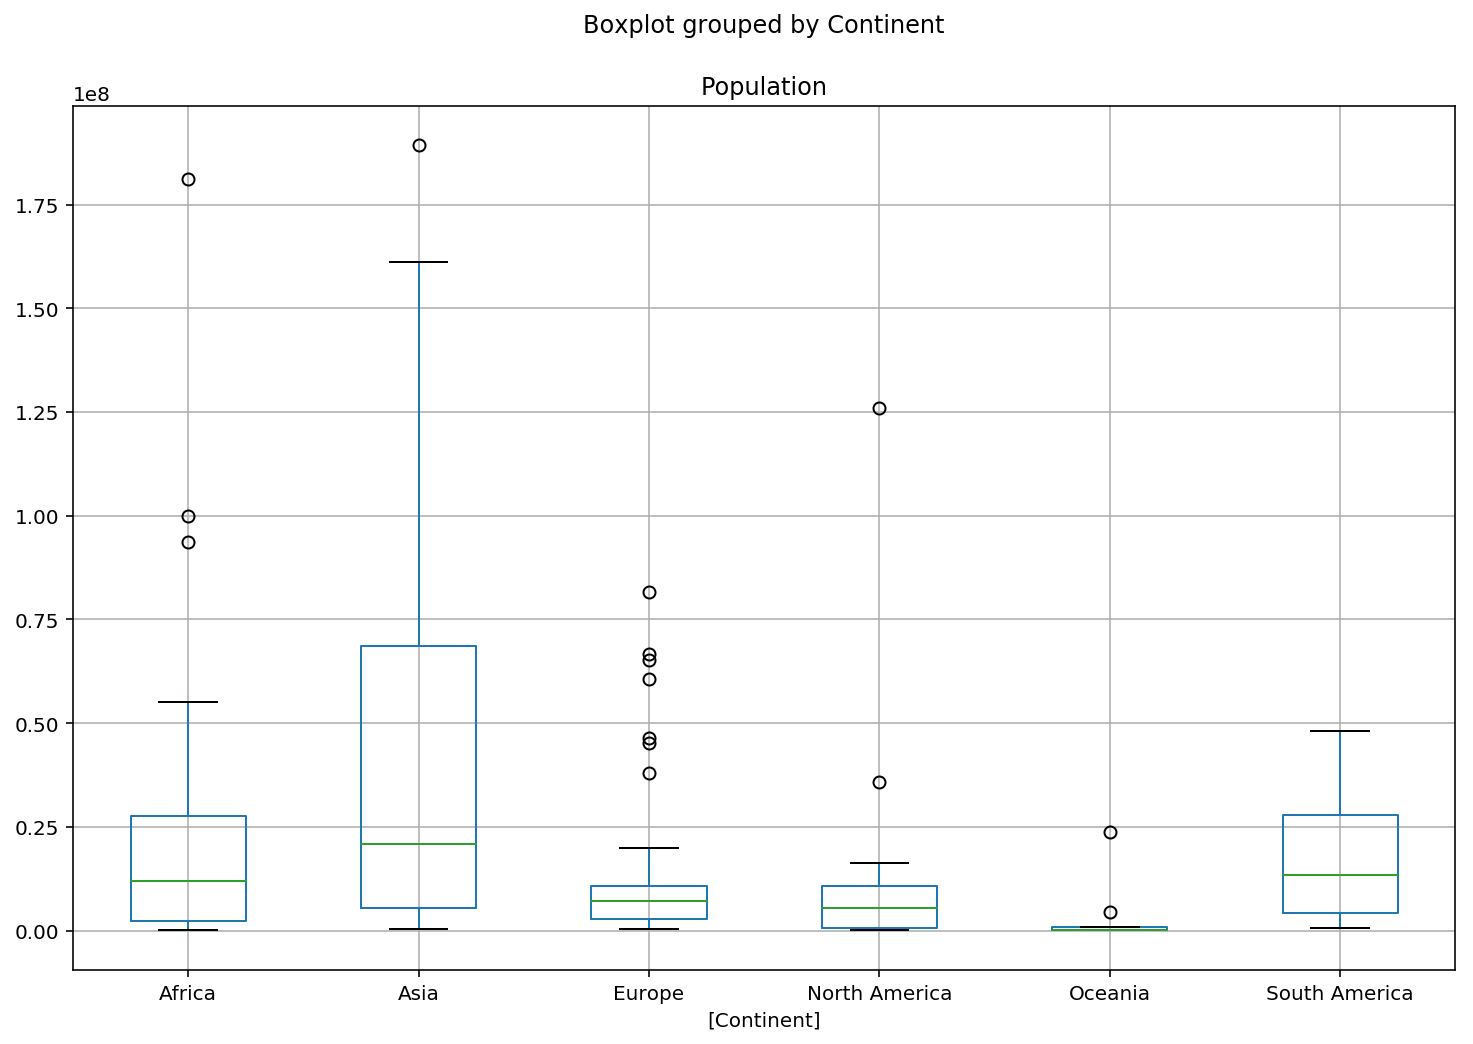

In [13]:
#各大洲国家的人口数箱线图，反映各大洲国家人口分布情况，均值是多少，中位数是多少，最大最小值等
#主要看中位数，为了强调中位数，筛选掉人口数大于2亿的国家（认为是离群值）
wi[["Continent","Population"]][wi.Population<200000000].boxplot(by="Continent",figsize=(12,8))

#### 二维数据分析

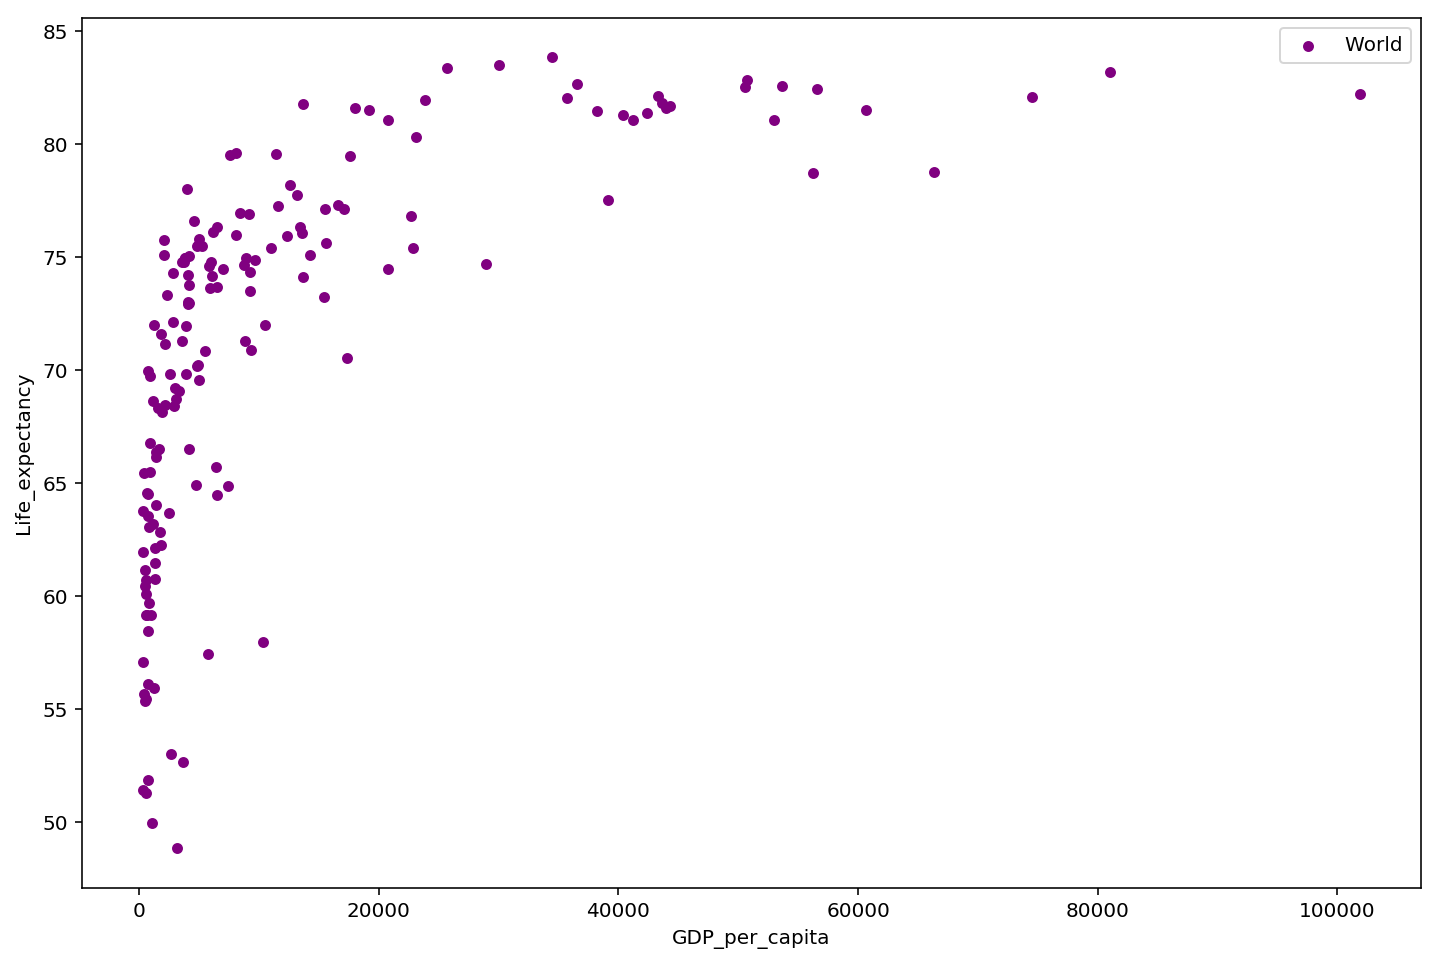

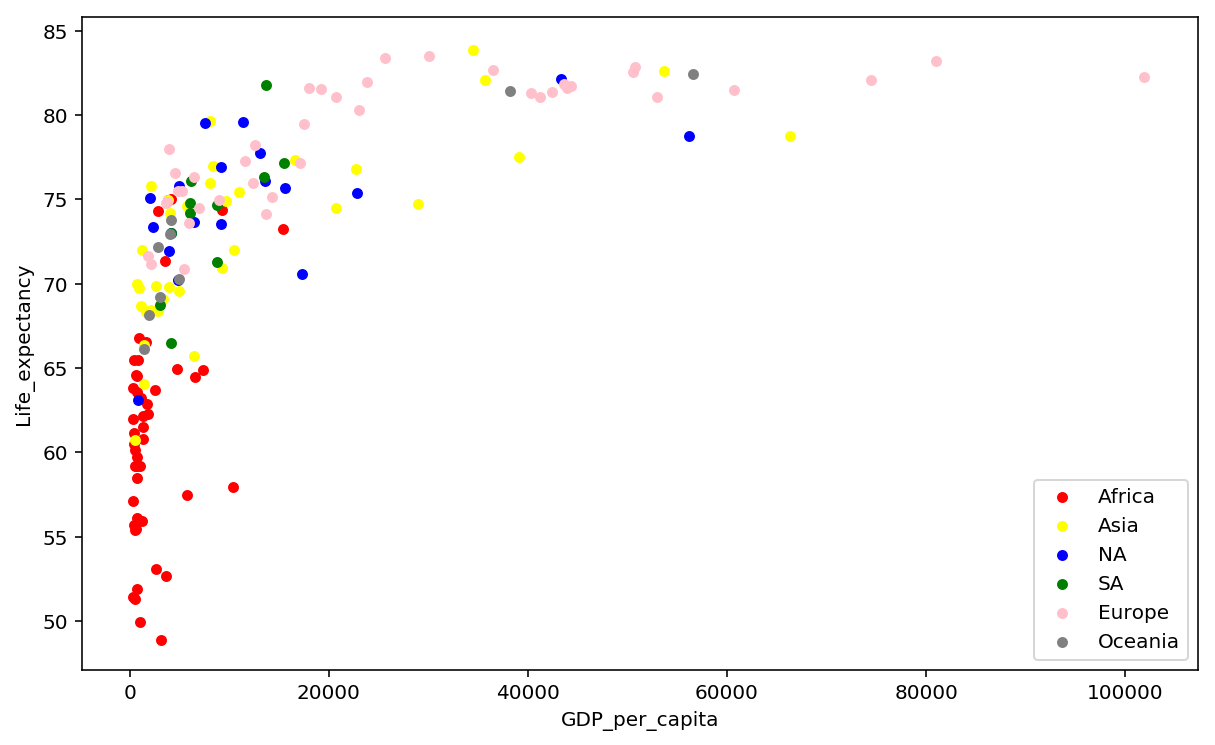

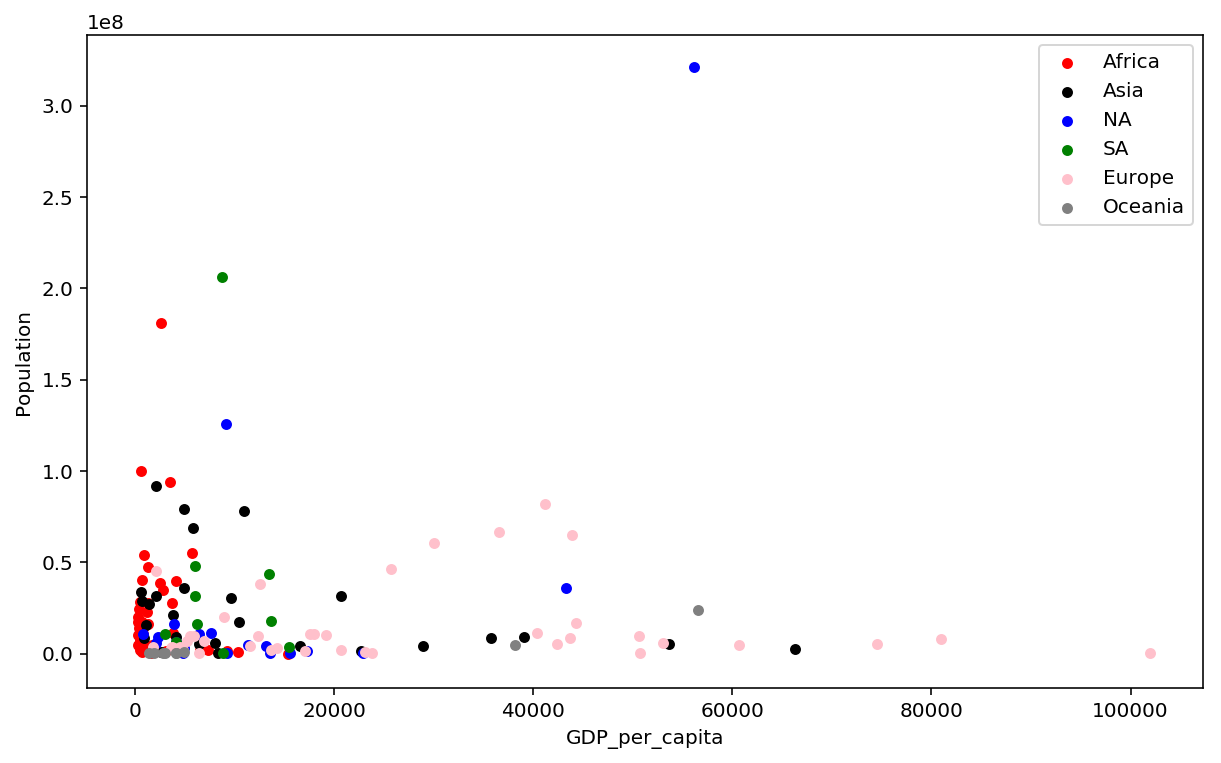

In [72]:
#各大洲国家的GDP-预期寿命散点分布图
Africa=wi[wi.Continent=="Africa"]
Asia=wi[wi.Continent=="Asia"]
NA=wi[wi.Continent=="North America"]
SA=wi[wi.Continent=="South America"]
Europe=wi[wi.Continent=="Europe"]
Oceania=wi[wi.Continent=="Oceania"]

#先绘制所有国家GDP-预期寿命的散点图
wi.plot(kind="scatter",x="GDP_per_capita",y="Life_expectancy",label="World",color="purple",figsize=(12,8))

#再按洲绘制GDP-预期寿命散点图
bx=Africa.plot(kind="scatter",x="GDP_per_capita",y="Life_expectancy",label="Africa",color="red",figsize=(10,6))
Asia.plot(ax=bx,kind="scatter",x="GDP_per_capita",y="Life_expectancy",label="Asia",color="yellow")
NA.plot(ax=bx,kind="scatter",x="GDP_per_capita",y="Life_expectancy",label="NA",color="blue")
SA.plot(ax=bx,kind="scatter",x="GDP_per_capita",y="Life_expectancy",label="SA",color="green")
Europe.plot(ax=bx,kind="scatter",x="GDP_per_capita",y="Life_expectancy",label="Europe",color="pink")
Oceania.plot(ax=bx,kind="scatter",x="GDP_per_capita",y="Life_expectancy",label="Oceania",color="gray")
#可以看到，GDP超过20000后，预期寿命随GDP的增长而陡增，说明经济水平很大程度上决定了一个地方的预期寿命（医疗、教育、健康意识、食品安全等因素）


#各大洲国家的人口数量-GDP散点分布图（去除人口数最多的中国、印度）
cx=Africa.plot(kind="scatter",x="GDP_per_capita",y="Population",label="Africa",color="red",figsize=(10,6))
Asia[Asia.Population<100000000].plot(ax=cx,kind="scatter",x="GDP_per_capita",y="Population",label="Asia",color="black")
NA.plot(ax=cx,kind="scatter",x="GDP_per_capita",y="Population",label="NA",color="blue")
SA.plot(ax=cx,kind="scatter",x="GDP_per_capita",y="Population",label="SA",color="green")
Europe.plot(ax=cx,kind="scatter",x="GDP_per_capita",y="Population",label="Europe",color="pink")
Oceania.plot(ax=cx,kind="scatter",x="GDP_per_capita",y="Population",label="Oceania",color="gray")
#发现人口数量和GDP的关联性不强，因此不做深入分析

#### 三维数据分析（待学习）

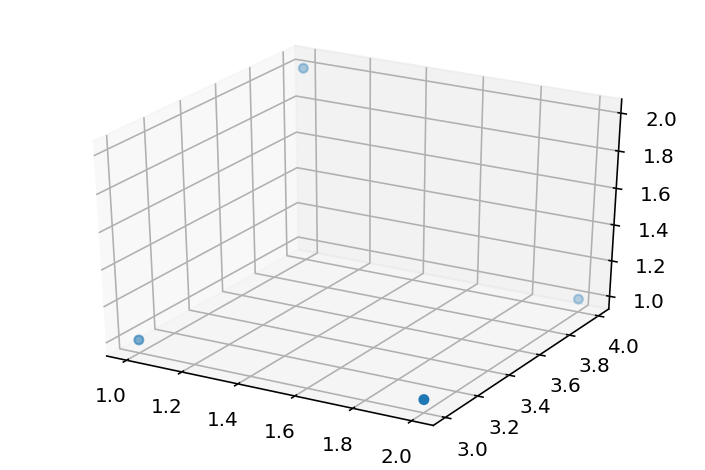

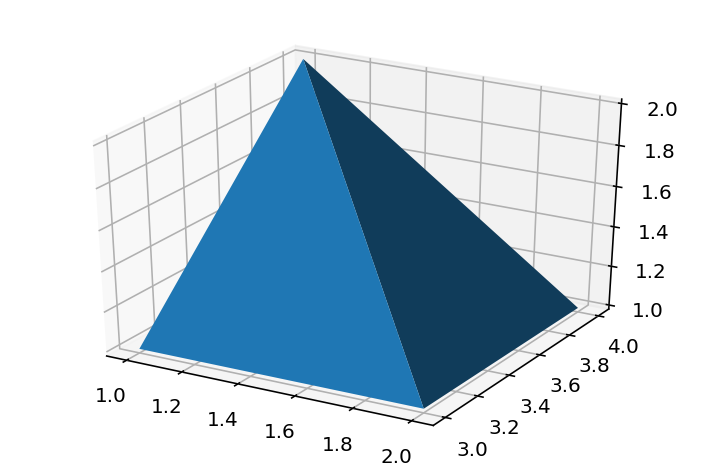

In [19]:
#下面给出示例，具体需要进一步学习
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')  
X = [1, 1, 2, 2]  
Y = [3, 4, 4, 3]  
Z = [1, 2, 1, 1]  
ax.scatter(X, Y, Z)  
plt.show()  

import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')  
X = [1, 1, 2, 2]  
Y = [3, 4, 4, 3]  
Z = [1, 2, 1, 1]  
ax.plot_trisurf(X, Y, Z)  
plt.show() 